In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [2]:
df1 = df.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.955850,-2.020703,-3.646145,-2.497687,-2.461782,-0.151070,-1.970182,-2.108545,-0.023784,-1.020939,...,-0.736489,-1.866098,-2.415152,-2.417482,-3.148657,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,0.910467,1.444038,0.807100,0.681855,0.003288,1.686033,1.392592,0.987808,1.351905,-1.152194,...,0.705192,-0.192456,2.238519,0.527563,-1.420564,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-2.081130,-1.991341,-2.705589,-2.724797,-2.635379,-0.561297,-2.048386,-2.108545,-0.818195,-1.283449,...,-0.592321,-1.587158,0.417517,-2.494983,-3.524330,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,0.526225,0.122738,0.883880,-1.967763,-1.559081,-1.916829,-1.500958,-1.217813,-2.097005,-0.889684,...,-0.736489,1.202246,-1.605818,-1.900807,-3.477695,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,-0.681392,-1.110475,0.480784,0.908965,0.940708,-0.115398,0.532347,0.521234,0.228103,0.685375,...,-0.736489,0.923305,0.417517,0.837567,1.271324,0.300651,2.019853,2.833971,-0.163927,1.563782


In [4]:
train=df1[0:(round(len(df1)*.8))] 
test=df1[(round(len(df1)*.8 - 1)):]
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [5]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [6]:
train_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Mike Higgins,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,0.300651,2.019853,2.833971,-0.163927,1.563782


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


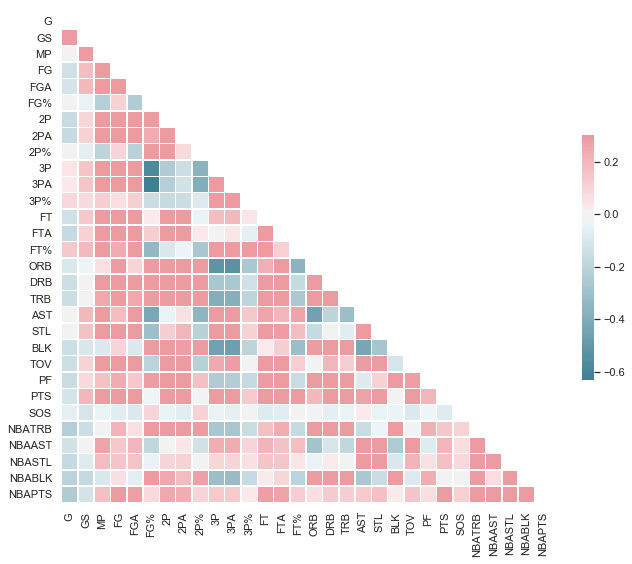

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df1

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([-0.20049662,  0.01642821, -0.34001949, -0.0868779 , -3.11696692,
        0.01101756,  0.21389603,  1.86841837, -0.11077694, -0.30270585,
        1.98849383, -0.02493392,  0.00994509, -0.2441991 , -0.05355712,
       -0.0236156 , -0.00908042,  0.07993055,  0.28295546,  0.11496661,
        0.07924509, -0.15604486,  0.00327006,  1.37026329,  0.10534916])

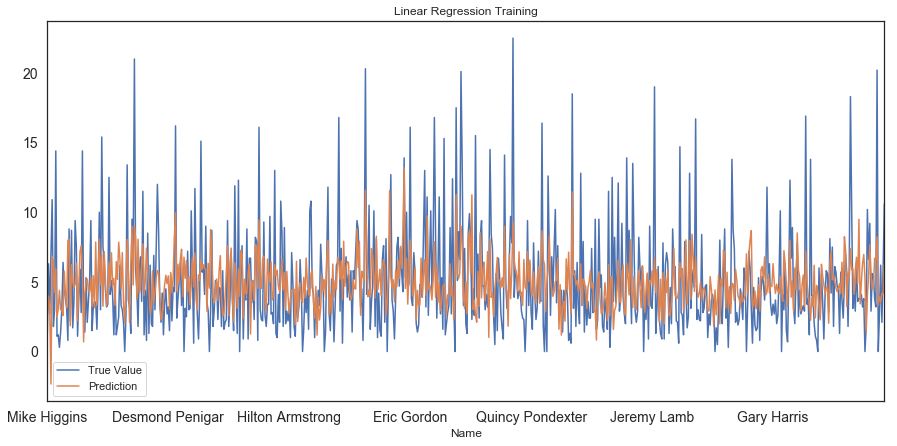

adj train r^2 = 0.1876527019764489
train mse = 11.279101660021427


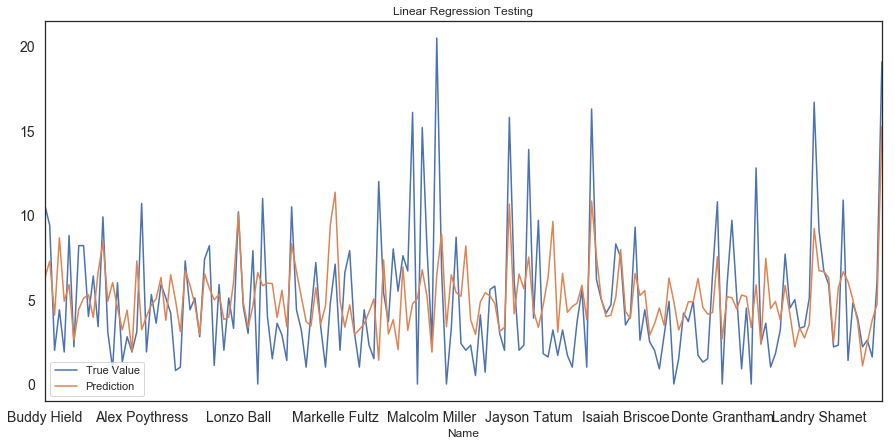

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.21773342642116789
test mse = 11.221680828394026


In [9]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Extra Trees

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

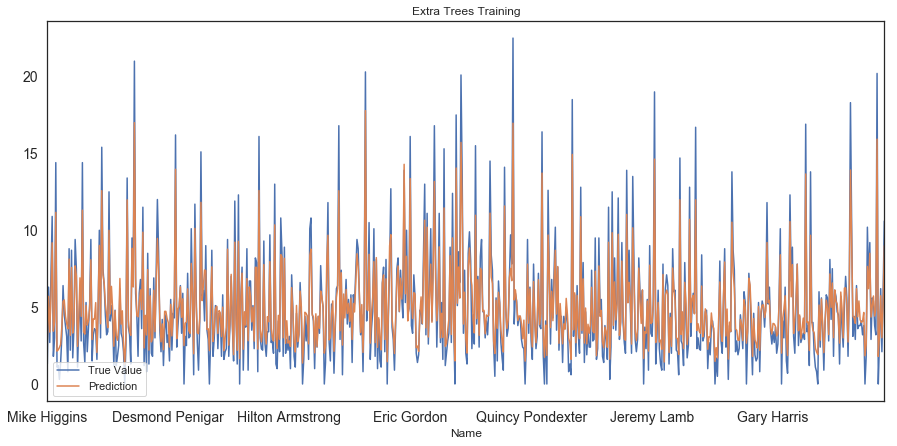

adj train r^2 = 0.8777368053957073
train mse = 1.697573198773441


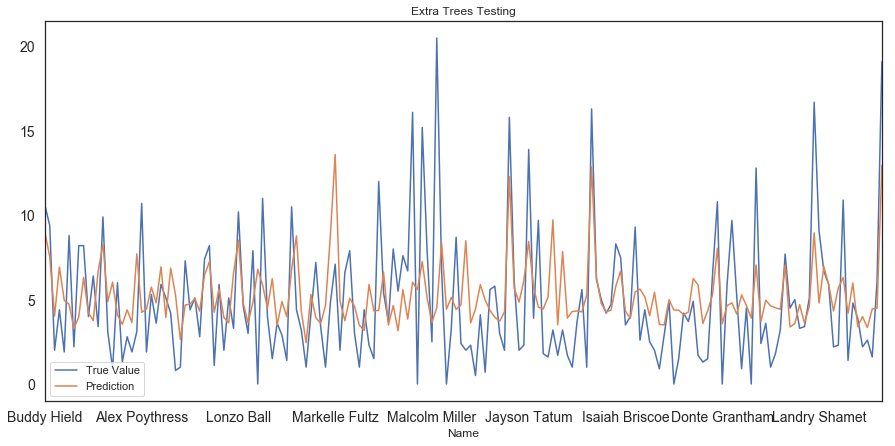

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.22973062962010038
test mse = 11.049579923563222


In [11]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [12]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

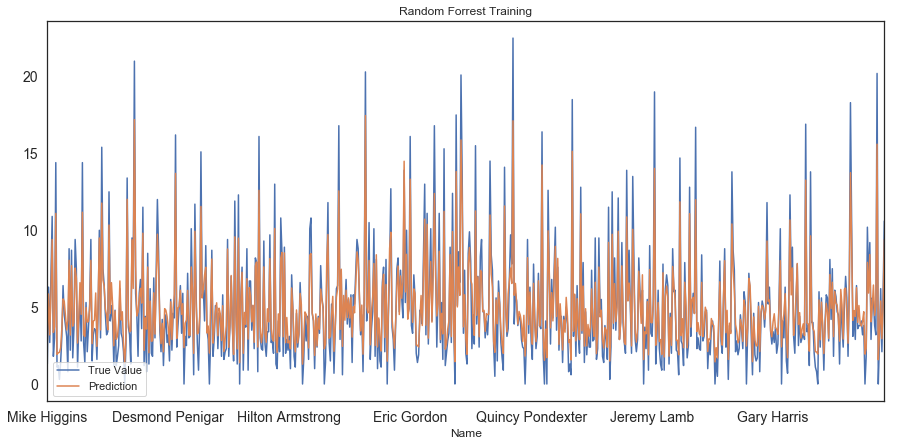

adj train r^2 = 0.8738897284563478
train mse = 1.750988249206342


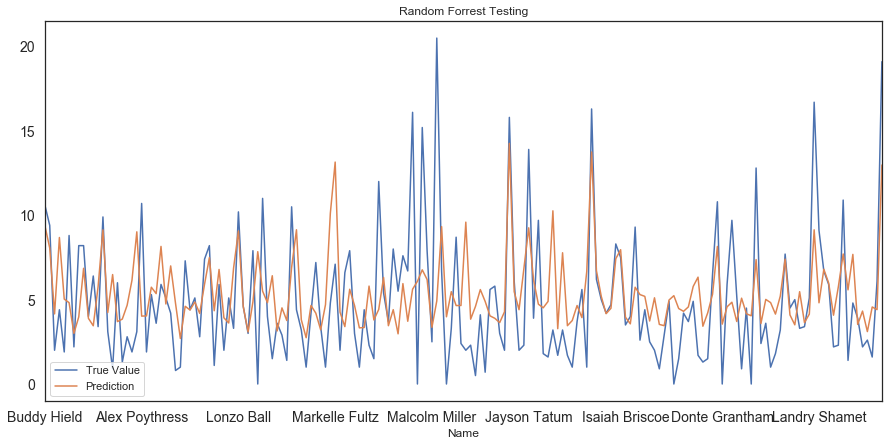

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.19864373236751154
test mse = 11.495524120459777


In [13]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [14]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [15]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

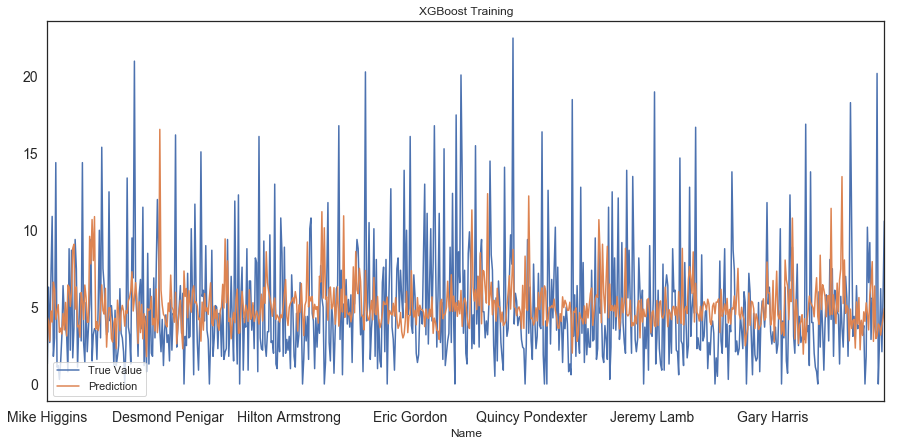

adj train r^2 = -0.2263530912449898
train mse = 17.027398528791263


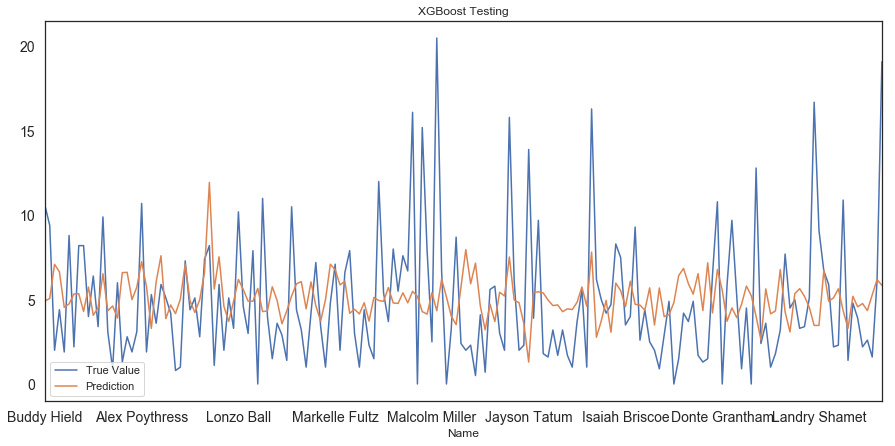

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = -0.1196563593731188
test mse = 16.061566129414338


In [16]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Feed Forward Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(128, input_dim=25, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 693 samples, validate on 174 samples
Epoch 1/500
693/693 [==============================] - 1s 2ms/step - loss: 19.3724 - val_loss: 16.4285
Epoch 2/500
693/693 [==============================] - 0s 113us/step - loss: 14.3838 - val_loss: 12.1030
Epoch 3/500
693/693 [==============================] - 0s 120us/step - loss: 10.5779 - val_loss: 8.8731
Epoch 4/500
693/693 [==============================] - 0s 109us/step - loss: 7.7794 - val_loss: 6.5180
Epoch 5/500
693/693 [==============================] - 0s 105us/step - loss: 5.7213 - val_loss: 4.8091
Epoch 6/500
693/693 [==============================] - 0s 113us/step - loss: 4.2620 - val_loss: 3.5992
Epoch 7/500
693/693 [==============================] - 0s 254us/step - loss: 3.2222 - val_loss: 2.7502
Epoch 8/500
693/693 [==============================] - 0s 110us/step - loss: 2.5003 - val_loss: 2.1651
Epoch 9/500
693/693 [==============================] - 0s 118us/step - loss: 2.

Epoch 77/500
693/693 [==============================] - 0s 104us/step - loss: 0.9126 - val_loss: 0.8430
Epoch 78/500
693/693 [==============================] - 0s 98us/step - loss: 0.8979 - val_loss: 0.8426
Epoch 79/500
693/693 [==============================] - 0s 99us/step - loss: 0.9058 - val_loss: 0.8417
Epoch 80/500
693/693 [==============================] - 0s 100us/step - loss: 0.9103 - val_loss: 0.8434
Epoch 81/500
693/693 [==============================] - 0s 101us/step - loss: 0.9099 - val_loss: 0.8443
Epoch 82/500
693/693 [==============================] - 0s 100us/step - loss: 0.9123 - val_loss: 0.8439
Epoch 83/500
693/693 [==============================] - 0s 100us/step - loss: 0.9164 - val_loss: 0.8433
Epoch 84/500
693/693 [==============================] - 0s 98us/step - loss: 0.9097 - val_loss: 0.8449
Epoch 85/500
693/693 [==============================] - 0s 270us/step - loss: 0.9095 - val_loss: 0.8437
Epoch 86/500
693/693 [==============================] - 0s 106us/st

693/693 [==============================] - 0s 105us/step - loss: 0.8803 - val_loss: 0.8228
Epoch 156/500
693/693 [==============================] - 0s 101us/step - loss: 0.8707 - val_loss: 0.8233
Epoch 157/500
693/693 [==============================] - 0s 100us/step - loss: 0.8779 - val_loss: 0.8217
Epoch 158/500
693/693 [==============================] - 0s 132us/step - loss: 0.8793 - val_loss: 0.8212
Epoch 159/500
693/693 [==============================] - 0s 103us/step - loss: 0.8828 - val_loss: 0.8231
Epoch 160/500
693/693 [==============================] - 0s 100us/step - loss: 0.8747 - val_loss: 0.8225
Epoch 161/500
693/693 [==============================] - 0s 97us/step - loss: 0.8734 - val_loss: 0.8226
Epoch 162/500
693/693 [==============================] - 0s 96us/step - loss: 0.8963 - val_loss: 0.8219
Epoch 163/500
693/693 [==============================] - 0s 100us/step - loss: 0.8867 - val_loss: 0.8241
Epoch 164/500
693/693 [==============================] - 0s 113us/step 

693/693 [==============================] - 0s 112us/step - loss: 0.8699 - val_loss: 0.8150
Epoch 234/500
693/693 [==============================] - 0s 107us/step - loss: 0.8666 - val_loss: 0.8156
Epoch 235/500
693/693 [==============================] - 0s 356us/step - loss: 0.8713 - val_loss: 0.8185
Epoch 236/500
693/693 [==============================] - 0s 116us/step - loss: 0.8825 - val_loss: 0.8232
Epoch 237/500
693/693 [==============================] - 0s 132us/step - loss: 0.8806 - val_loss: 0.8194
Epoch 238/500
693/693 [==============================] - 0s 119us/step - loss: 0.8887 - val_loss: 0.8171
Epoch 239/500
693/693 [==============================] - 0s 134us/step - loss: 0.8742 - val_loss: 0.8212
Epoch 240/500
693/693 [==============================] - 0s 114us/step - loss: 0.8955 - val_loss: 0.8232
Epoch 241/500
693/693 [==============================] - 0s 122us/step - loss: 0.8880 - val_loss: 0.8290
Epoch 242/500
693/693 [==============================] - 0s 116us/ste

693/693 [==============================] - 0s 207us/step - loss: 0.8628 - val_loss: 0.8137
Epoch 312/500
693/693 [==============================] - 0s 173us/step - loss: 0.8777 - val_loss: 0.8176
Epoch 313/500
693/693 [==============================] - 0s 97us/step - loss: 0.8572 - val_loss: 0.8130
Epoch 314/500
693/693 [==============================] - 0s 98us/step - loss: 0.8633 - val_loss: 0.8126
Epoch 315/500
693/693 [==============================] - 0s 101us/step - loss: 0.8692 - val_loss: 0.8123
Epoch 316/500
693/693 [==============================] - 0s 119us/step - loss: 0.8643 - val_loss: 0.8093
Epoch 317/500
693/693 [==============================] - 0s 116us/step - loss: 0.8652 - val_loss: 0.8086
Epoch 318/500
693/693 [==============================] - 0s 109us/step - loss: 0.8662 - val_loss: 0.8107
Epoch 319/500
693/693 [==============================] - 0s 110us/step - loss: 0.8673 - val_loss: 0.8127
Epoch 320/500
693/693 [==============================] - 0s 111us/step 

693/693 [==============================] - 0s 105us/step - loss: 0.8687 - val_loss: 0.8181
Epoch 390/500
693/693 [==============================] - 0s 118us/step - loss: 0.8531 - val_loss: 0.8131
Epoch 391/500
693/693 [==============================] - 0s 134us/step - loss: 0.8555 - val_loss: 0.8087
Epoch 392/500
693/693 [==============================] - 0s 146us/step - loss: 0.8470 - val_loss: 0.8099
Epoch 393/500
693/693 [==============================] - 0s 115us/step - loss: 0.8485 - val_loss: 0.8072
Epoch 394/500
693/693 [==============================] - 0s 120us/step - loss: 0.8520 - val_loss: 0.8079
Epoch 395/500
693/693 [==============================] - 0s 260us/step - loss: 0.8498 - val_loss: 0.8111
Epoch 396/500
693/693 [==============================] - 0s 155us/step - loss: 0.8637 - val_loss: 0.8104
Epoch 397/500
693/693 [==============================] - 0s 149us/step - loss: 0.8493 - val_loss: 0.8086
Epoch 398/500
693/693 [==============================] - 0s 114us/ste

693/693 [==============================] - 0s 108us/step - loss: 0.8548 - val_loss: 0.8149
Epoch 468/500
693/693 [==============================] - 0s 108us/step - loss: 0.8537 - val_loss: 0.8128
Epoch 469/500
693/693 [==============================] - 0s 110us/step - loss: 0.8741 - val_loss: 0.8150
Epoch 470/500
693/693 [==============================] - 0s 99us/step - loss: 0.8653 - val_loss: 0.8143
Epoch 471/500
693/693 [==============================] - 0s 96us/step - loss: 0.8659 - val_loss: 0.8142
Epoch 472/500
693/693 [==============================] - 0s 96us/step - loss: 0.8619 - val_loss: 0.8192
Epoch 473/500
693/693 [==============================] - 0s 96us/step - loss: 0.8821 - val_loss: 0.8161
Epoch 474/500
693/693 [==============================] - 0s 97us/step - loss: 0.8556 - val_loss: 0.8187
Epoch 475/500
693/693 [==============================] - 0s 95us/step - loss: 0.8767 - val_loss: 0.8163
Epoch 476/500
693/693 [==============================] - 0s 99us/step - los

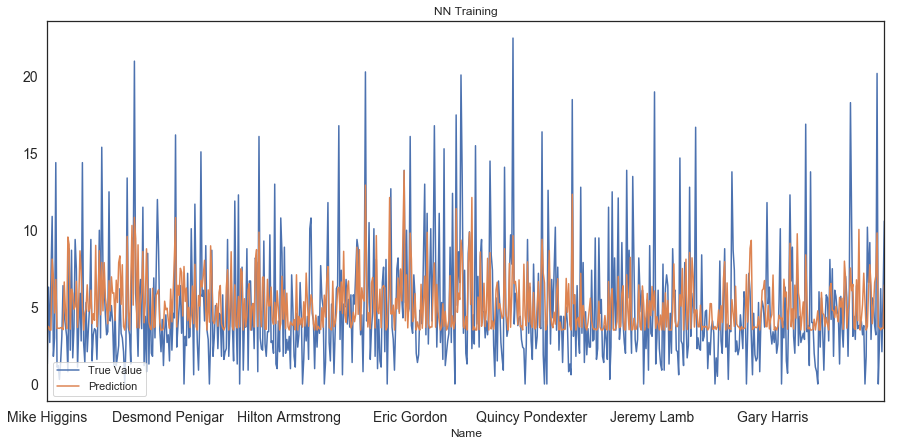

adj train r^2 = 0.20073031091978688
train mse = 11.09752454257327


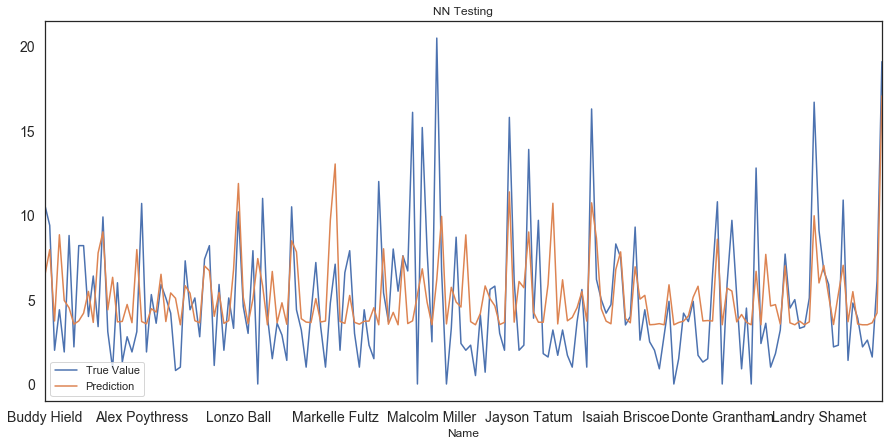

adj test r^2 = 0.24513767167844502
test mse = 10.828564588985639


In [20]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## LSTM

In [29]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [39]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=100, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 693 samples, validate on 174 samples
Epoch 1/100
693/693 [==============================] - 9s 13ms/step - loss: 0.9074 - val_loss: 0.7718
Epoch 2/100
693/693 [==============================] - 4s 6ms/step - loss: 0.8031 - val_loss: 0.7754
Epoch 3/100
693/693 [==============================] - 5s 7ms/step - loss: 0.7133 - val_loss: 0.8154
Epoch 4/100
693/693 [==============================] - 5s 7ms/step - loss: 0.6395 - val_loss: 0.8510
Epoch 5/100
693/693 [==============================] - 5s 7ms/step - loss: 0.5893 - val_loss: 0.9035
Epoch 6/100
693/693 [==============================] - 5s 7ms/step - loss: 0.5390 - val_loss: 0.9692
Epoch 7/100
693/693 [==============================] - 5s 7ms/step - loss: 0.4884 - val_loss: 1.0208
Epoch 8/100
693/693 [==============================] - 4s 6ms/step - loss: 0.4337 - val_loss: 1.0779
Epoch 9/100
693/693 [==============================] - 5s 7ms/step - loss: 0.3780 - val_loss: 1.1098
Epoch 10/100
693/693 [======================

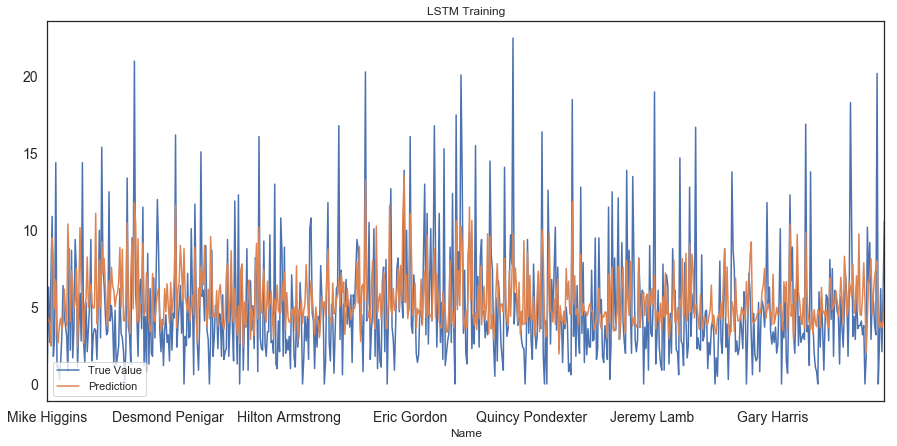

adj train r^2 = 0.19049758203179512
train mse = 11.23960169315641


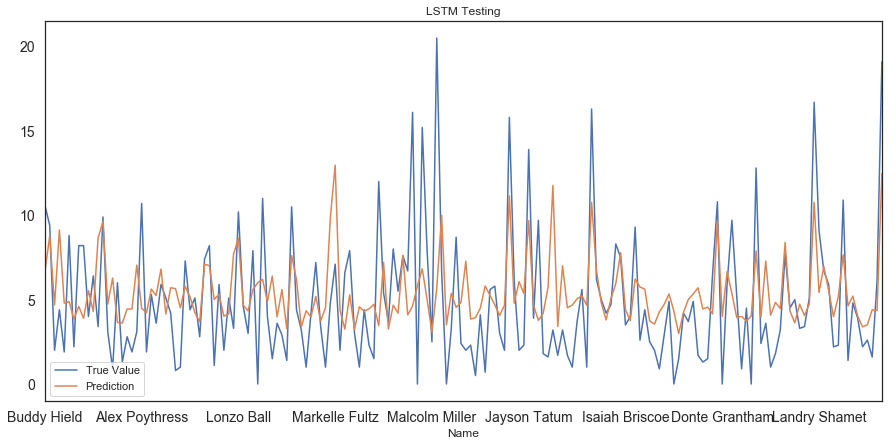

adj test r^2 = 0.22086014266802267
test mse = 11.17682781671204


In [40]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [42]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



5.00281465 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(PCA(DecisionTreeRegressor(LinearSVR(SelectPercentile(ZeroCount(LinearSVR(DecisionTreeRegressor(input_matrix, max_depth=1, min_samples_leaf=8, min_samples_split=5), C=0.1, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.01)), percentile=42), C=0.01, dual=False, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.01), max_depth=2, min_samples_leaf=12, min_samples_split=20), iterated_power=6, svd_solver=randomized), C=0.01, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=0.01)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

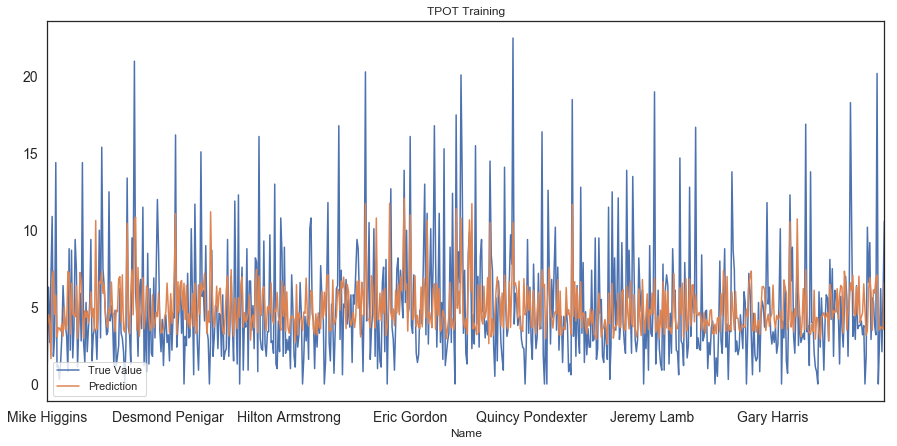

adj train r^2 = 0.20411824826026537
train mse = 11.050484452978571


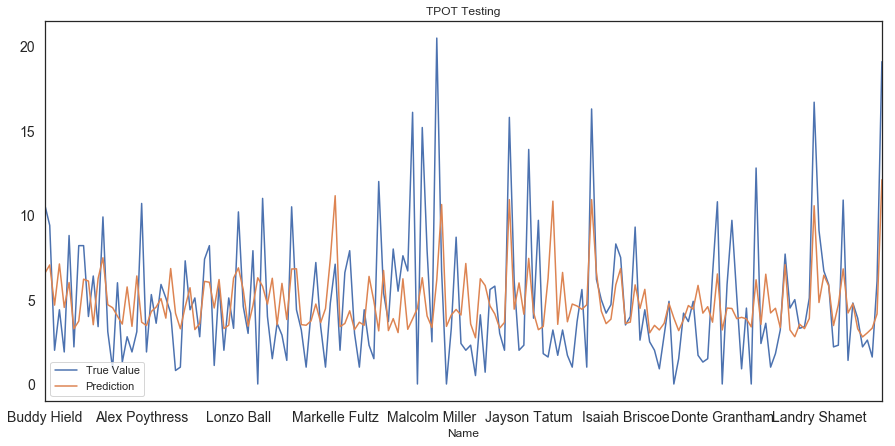

adj test r^2 = 0.22835840374301497
test mse = 11.069264621001677


In [43]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [45]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Derrick White,-0.461503,-0.508681,-0.712588,-0.163927,3.2,10.836230,-7.636230
Chris Boucher,-0.754639,-0.903765,-1.258213,-0.838324,0.0,6.295059,-6.295059
Justin Patton,-1.340912,-0.903765,1.469910,-0.838324,2.0,7.142061,-5.142061
Jacob Pullen,-1.340912,-0.903765,-1.258213,-0.838324,0.7,5.835861,-5.135861
Thomas Bryant,-0.696012,-0.587698,-0.985400,-0.501126,1.5,6.265903,-4.765903


In [46]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.828296,2.019853,2.833971,0.173272,20.5,6.181888,14.318112
Kyle Kuzma,2.352604,0.518536,0.378661,0.510471,16.1,3.855270,12.244730
Lauri Markkanen,3.056131,0.044435,0.378661,1.184868,15.2,6.299298,8.900702
Andre Ingram,0.417905,1.861820,2.833971,4.219657,12.0,3.147711,8.852289
Alex Poythress,1.473195,-0.271631,0.105849,0.173272,10.7,3.662865,7.037135
